<a href="https://colab.research.google.com/github/busmiss/aipython/blob/main/240115.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   number_courses  100 non-null    int64  
 1   time_study      100 non-null    float64
 2   Marks           100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB
       number_courses  time_study       Marks
count      100.000000  100.000000  100.000000
mean         5.290000    4.077140   24.417690
std          1.799523    2.372914   14.326199
min          3.000000    0.096000    5.609000
25%          4.000000    2.058500   12.633000
50%          5.000000    4.022000   20.059500
75%          7.000000    6.179250   36.676250
max          8.000000    7.957000   55.299000


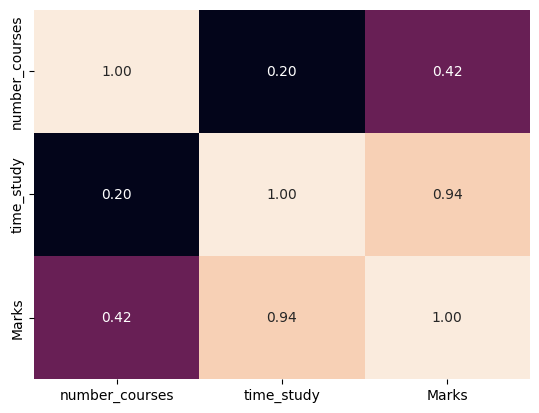

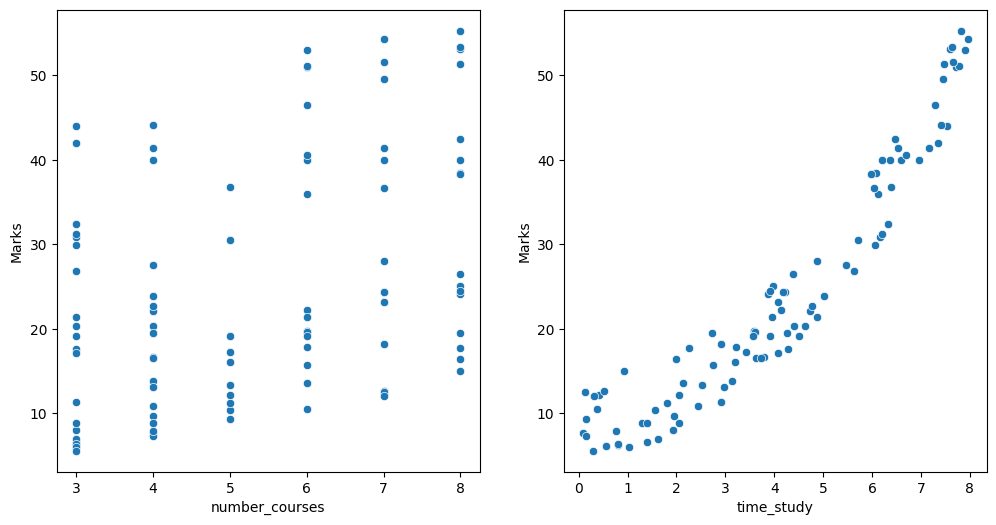

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

std_df = pd.read_csv('Student_Marks.csv')
std_df

std_df.info()
d = std_df.describe()
print(d)
c = std_df.corr()
sns.heatmap(data = c,annot=True,fmt='.2f',cbar=False)

fig, ax=plt.subplots(ncols=2 , figsize=(12,6))
sns.scatterplot(data=std_df, x='number_courses',y='Marks', ax=ax[0])
sns.scatterplot(data=std_df, x='time_study',y='Marks', ax=ax[1])
plt.show()

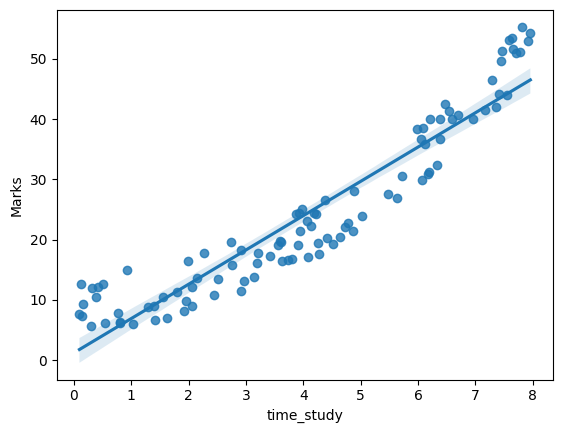

R^2 : 0.9219617777759717	RMS : 14.200726136374552


In [17]:
x = std_df.drop('Marks',axis=1)
y = std_df['Marks']
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.2,random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, Y_train)

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

lr_pred = lr_model.predict(X_test)
e1=r2_score(lr_pred,Y_test)
e2=mean_squared_error(lr_pred,Y_test)

sns.regplot(x=std_df['time_study'],y=std_df['Marks'])
plt.show()
print("R^2 : {}\tRMS : {}".format(e1,e2))


The score of this line for the data:  0.903203123105647
[63.71244635 66.47353362]


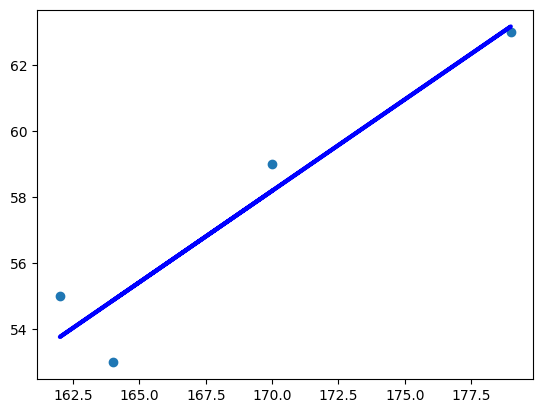

[207.26270241 351.3233478 ]
[2]


In [20]:
import numpy as np
from sklearn import linear_model #scikit-learn 모듈을 가져옴.
from sklearn import tree
import matplotlib.pyplot as plt
import pandas as pd

regr = linear_model.LinearRegression()

x=[[164],[179],[162],[170]]
y=[53,63,55,59]
regr.fit(x,y)

score = regr.score(x, y)
print("The score of this line for the data: ", score)

input_data = [[180], [185]] #새로 예측해 볼 데이터
result = regr.predict(input_data)
print(result)

plt.scatter(x, y)
y_pred = regr.predict(x)
plt.plot(x, y_pred, color = 'blue', linewidth = 3)
plt.show()

#면적에 따른 수확량 예측

harvest_area = [[2.1], [10], [3], [1], [3.5], [5] ,[8]]
harvest = [64.9, 292.6, 85.9,30.92,110.5,163.4,230.1]

regr = linear_model.LinearRegression()
regr.fit(harvest_area,harvest)

pred = regr.predict([[7],[12]])
print(pred)

#<<<분류형 형태로 예측>>>
#3.1 부모의 키 데이터를 측정하여 자녀의 키가 속하는 그룹을 예측

x = [[180,165],[175,160],[180,172],[165,160],[171,152]]
y = [3,2,2,1,1]

dt_model = tree.DecisionTreeClassifier()
dt_model.fit(x,y)
dt_pred = dt_model.predict([[175,153]])
print(dt_pred)